This page is used to extract and merge the 6 user's datasets into one that will be use to create our train and test dataset.  

In [1]:
import os
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
SPAM_DATA_PATH = [
    "./data/enron1/spam/",
    "./data/enron2/spam/",
    "./data/enron3/spam/",
    "./data/enron4/spam/",
    "./data/enron5/spam/",
    "./data/enron6/spam/",
]

HAM_DATA_PATH = [
    "./data/enron1/ham/",
    "./data/enron2/ham/",
    "./data/enron3/ham/",
    "./data/enron4/ham/",
    "./data/enron5/ham/",
    "./data/enron6/ham/",
]

CONCAT_PATH = "./data/concat_data/"
TRAIN_PATH = "./data/train/"
TEST_PATH = "./data/test/"

# Conatenation of all messages SPAM & HAM

In [5]:
spam_messages = []

for path in SPAM_DATA_PATH:
    print(path)
    for file in tqdm(os.listdir(path)):
        with open(path + file, "r", encoding="latin-1") as f:
            spam_messages.append(" ".join([str(line).replace("\n", "") for line in f.readlines()]))
            
len(spam_messages)

./data/enron1/spam/


100%|██████████| 1500/1500 [00:00<00:00, 10201.18it/s]


./data/enron2/spam/


100%|██████████| 1496/1496 [00:00<00:00, 10185.92it/s]


./data/enron3/spam/


100%|██████████| 1500/1500 [00:00<00:00, 10449.50it/s]


./data/enron4/spam/


100%|██████████| 4500/4500 [00:21<00:00, 213.63it/s]


./data/enron5/spam/


100%|██████████| 3675/3675 [00:15<00:00, 241.22it/s]


./data/enron6/spam/


100%|██████████| 4500/4500 [00:17<00:00, 258.45it/s]


17171

In [6]:
ham_messages = []

for path in HAM_DATA_PATH:
    print(path)
    for file in tqdm(os.listdir(path)):
        with open(path + file, "r", encoding="latin-1") as f:
            ham_messages.append(" ".join([str(line).replace("\n", "") for line in f.readlines()]))
            
len(ham_messages)

./data/enron1/ham/


100%|██████████| 3672/3672 [00:13<00:00, 277.96it/s]


./data/enron2/ham/


100%|██████████| 4361/4361 [00:18<00:00, 233.30it/s]


./data/enron3/ham/


100%|██████████| 4012/4012 [00:15<00:00, 253.42it/s]


./data/enron4/ham/


100%|██████████| 1500/1500 [00:05<00:00, 274.02it/s]


./data/enron5/ham/


100%|██████████| 1500/1500 [00:05<00:00, 273.95it/s]


./data/enron6/ham/


100%|██████████| 1500/1500 [00:05<00:00, 265.84it/s]


16545

In [7]:
ham_messages[0]

'Subject: christmas tree farm pictures'

In [8]:
spam_df = pd.DataFrame(spam_messages, columns=['message'])
spam_df['type'] = 'spam'
spam_df['code'] = 1
spam_df

message  type  code
0      Subject: dobmeos with hgh my energy level has ...  spam     1
1      Subject: your prescription is ready . . oxwq s...  spam     1
2      Subject: get that new car 8434 people nowthe w...  spam     1
3      Subject: await your response dear partner , we...  spam     1
4      Subject: coca cola , mbna america , nascar par...  spam     1
...                                                  ...   ...   ...
17166  Subject: = ? iso - 8859 - 1 ? q ? good _ news ...  spam     1
17167  Subject: all prescript medicines are on specia...  spam     1
17168  Subject: the next generation online pharmacy ....  spam     1
17169  Subject: bloow in 5 - 10 times the time learn ...  spam     1
17170  Subject: dear sir , i am interested in it hi :...  spam     1

[17171 rows x 3 columns]

In [9]:
ham_df = pd.DataFrame(ham_messages, columns=['message'])
ham_df['type'] = 'ham'
ham_df['code'] = 0
ham_df

message type  code
0                  Subject: christmas tree farm pictures  ham     0
1      Subject: vastar resources , inc . gary , produ...  ham     0
2      Subject: calpine daily gas nomination - calpin...  ham     0
3      Subject: re : issue fyi - see note below - alr...  ham     0
4      Subject: meter 7268 nov allocation fyi . - - -...  ham     0
...                                                  ...  ...   ...
16540  Subject: tw weekend scheduled volumes march 20...  ham     0
16541  Subject: fw : re ivanhoe e . s . d fyi , kim ....  ham     0
16542  Subject: fw : abandoned pipe ownership fyi , k...  ham     0
16543  Subject: fw : tw question in amarillo fyi , ki...  ham     0
16544  Subject: fw : re ivanhoe e . s . d fyi , kim ....  ham     0

[16545 rows x 3 columns]

In [10]:
full_df = pd.concat([ham_df, spam_df], ignore_index=True)

In [11]:
spam_df.to_csv(CONCAT_PATH + "spam_data.csv", index=False)

In [12]:
ham_df.to_csv(CONCAT_PATH + "ham_data.csv", index=False)

In [13]:
full_df.to_csv(CONCAT_PATH + "full_data.csv", index=False)

# Set train and test datasets

In [28]:
data_import = pd.DataFrame()
data_import = pd.read_csv(CONCAT_PATH + "full_data.csv", low_memory=True)             
data_import

message  type  code
0                  Subject: christmas tree farm pictures   ham     0
1      Subject: vastar resources , inc . gary , produ...   ham     0
2      Subject: calpine daily gas nomination - calpin...   ham     0
3      Subject: re : issue fyi - see note below - alr...   ham     0
4      Subject: meter 7268 nov allocation fyi . - - -...   ham     0
...                                                  ...   ...   ...
33711  Subject: = ? iso - 8859 - 1 ? q ? good _ news ...  spam     1
33712  Subject: all prescript medicines are on specia...  spam     1
33713  Subject: the next generation online pharmacy ....  spam     1
33714  Subject: bloow in 5 - 10 times the time learn ...  spam     1
33715  Subject: dear sir , i am interested in it hi :...  spam     1

[33716 rows x 3 columns]

<AxesSubplot:>

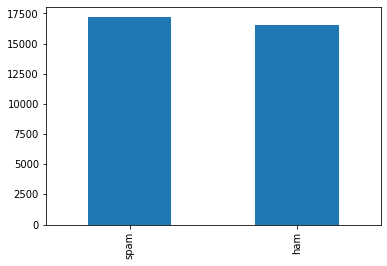

In [29]:
data_import['type'].value_counts().plot(kind='bar')

In [38]:
count_values = data_import['type'].value_counts()
count_values

spam    17171
ham     16545
Name: type, dtype: int64

In [40]:
total = count_values[0] + count_values[1]
print(f"% of spam : {count_values[0]/total*100}")
print(f"% of ham  : {count_values[1]/total*100}")

In [16]:
reduced = data_import.sample(frac = 1)[:4000]

In [17]:
train, test = train_test_split(reduced, test_size=0.2, random_state=42, shuffle=True)
print(len(train))
print(len(test))

3200
800


<AxesSubplot:>

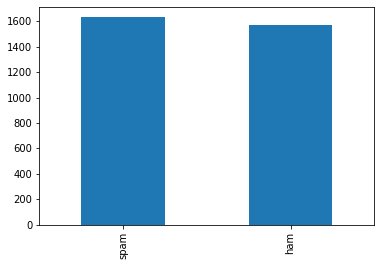

In [26]:
train['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

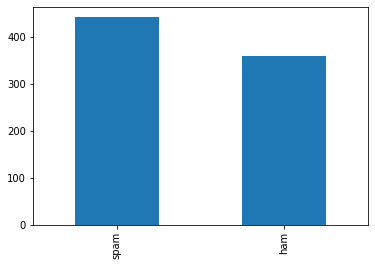

In [25]:
test['type'].value_counts().plot(kind='bar')

In [20]:
train.to_csv(TRAIN_PATH + "train.csv", index=False)
test.to_csv(TEST_PATH + "test.csv", index=False)

#### Smaller dataset for test purpose, not meant to be used for the global method

In [21]:
reduced_1000 = data_import.sample(frac = 1)[:1000]
train_1000, test_1000 = train_test_split(reduced_1000, test_size=0.2, random_state=42, shuffle=True)
train.to_csv(TRAIN_PATH + "train_1000.csv", index=False)
test.to_csv(TEST_PATH + "test_1000.csv", index=False)

### Duplicates check on training and testing sets

In [22]:
data_import = pd.DataFrame()
data_import = pd.read_csv(TRAIN_PATH + "train.csv", low_memory=True)  
count_unique = data_import['message'].nunique()                     
print(f"Number of unique messages in train set : {count_unique}")              
print(f"Number duplicated messages  in train set: {data_import.shape[0] - count_unique}")  

Number of unique messages in train set : 3161
Number duplicated messages  in train set: 39


In [23]:
data_import = pd.DataFrame()
data_import = pd.read_csv(TEST_PATH + "test.csv", low_memory=True)  
count_unique = data_import['message'].nunique()                     
print(f"Number of unique messages in test set : {count_unique}")              
print(f"Number duplicated messages  in test set: {data_import.shape[0] - count_unique}")  

Number of unique messages in test set : 798
Number duplicated messages  in test set: 2
